In [1]:
"""
This notebook contains basic analysis and visualization of a small sample size of the data
Reference: http://preprocessed-connectomes-project.org/abide/Pipelines.html
"""

'\nThis notebook contains basic analysis and visualization of a small sample size of the data\nReference: http://preprocessed-connectomes-project.org/abide/Pipelines.html\n'

In [1]:
from os import system

import pandas as pd
import glob
import scripts.vizer as vz
import seaborn as sns
# import st_gcn

In [2]:
hcp_filtered = pd.read_csv("HCP_1200_filtered.csv")

In [3]:
hcp_filtered.tail()

,subject,sex,age,svol,race,SSAGA_Alc_D4_Ab_Dx,SSAGA_Alc_D4_Dp_Dx,SSAGA_Mj_Ab_Dep
1086,992774,M,35,986206,White,1,1,0
1087,993675,F,29,912719,White,1,1,0
1088,994273,M,30,1069490,White,5,1,1
1089,995174,M,25,1088417,White,1,1,0
1090,996782,F,28,1138254,White,1,1,0


# Changing Data Representation
The categorical data of sex and race are currently not in a usable format, so we convert the data by sorting all possible values of a certain class (e.g., sex only has two values) into a list and using the index in that list as the class number for that particular value

In [4]:
def string_to_class_number(data):
    """
    Converts column categorical data from string format to class numbers.
    
    Args:
    data - pandas series, the column categorical data formated as string
    
    Return:
    pandas series with categorical variables converted to class numbers
    """
    possible_classes = sorted(list(data.unique()))
    return data.apply(lambda x: possible_classes.index(x))

In [5]:
hcp_filtered['sex'] = string_to_class_number(hcp_filtered['sex'])
hcp_filtered['race'] = string_to_class_number(hcp_filtered['race'])

In [6]:
print(hcp_filtered)

      subject  sex  age     svol  race  SSAGA_Alc_D4_Ab_Dx  \
0      100206    1   27  1239692     5                   1   
1      100307    0   27   957615     5                   1   
2      100408    1   33  1106881     5                   1   
3      100610    1   27  1155067     5                   1   
4      101006    0   35   916973     2                   5   
...       ...  ...  ...      ...   ...                 ...   
1086   992774    1   35   986206     5                   1   
1087   993675    0   29   912719     5                   1   
1088   994273    1   30  1069490     5                   5   
1089   995174    1   25  1088417     5                   1   
1090   996782    0   28  1138254     5                   1   

      SSAGA_Alc_D4_Dp_Dx  SSAGA_Mj_Ab_Dep  
0                      1                0  
1                      1                0  
2                      1                1  
3                      1                0  
4                      1           

Number of data points:  1091
Number of features:  8


                    num_present      max     min          mean     median
subject                    1091   996782  100206  3.726079e+05   211417.0
sex                        1091        1       0  4.564620e-01        0.0
age                        1091       37      22  2.878643e+01       29.0
svol                       1091  1461710  748507  1.033279e+06  1029193.0
race                       1091        5       0  4.242896e+00        5.0
SSAGA_Alc_D4_Ab_Dx         1091        5       1  1.601283e+00        1.0
SSAGA_Alc_D4_Dp_Dx         1091        5       1  1.227314e+00        1.0
SSAGA_Mj_Ab_Dep            1091        1       0  9.165903e-02        0.0 





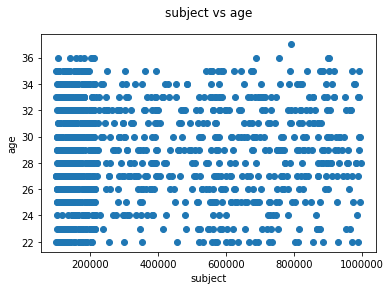

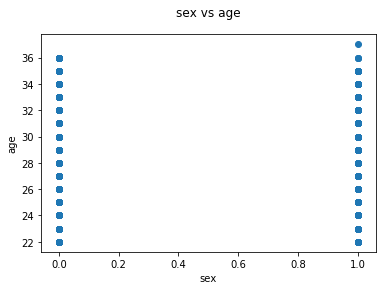

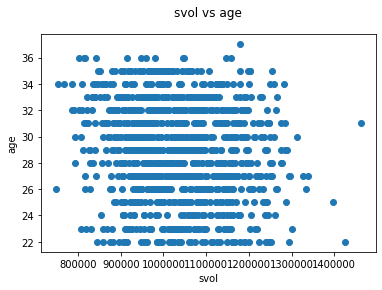

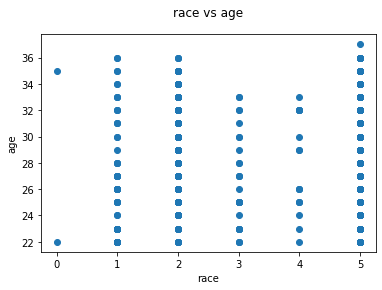

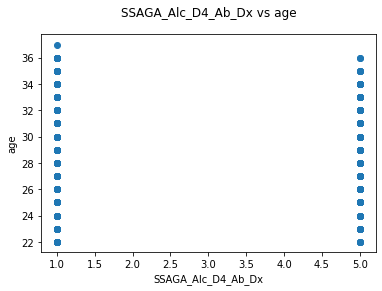

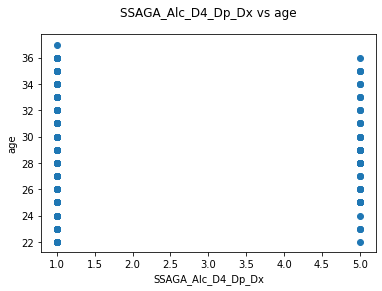

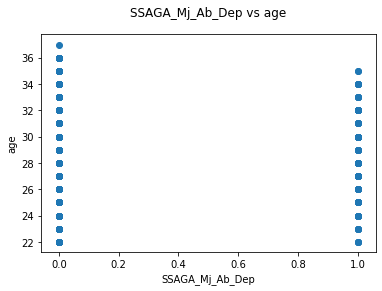

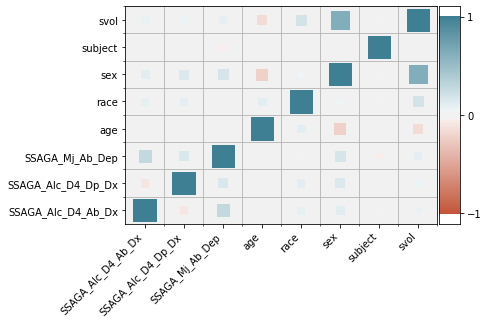

In [11]:
vz.summary(hcp_filtered, target_name="age")

In [ ]:
# import phenotype file for subject age and sex)
data_label = pd.read_csv('phenotypes_preprocessed.csv')
dlabel = data_label[['subject','AGE_AT_SCAN','SEX']]

In [ ]:
# find way to open data files
# files = []
df_list = []
for f in glob.glob("data/*.1D"):
    fo = open(f, "r")
    print(f)
    df_list.append(pd.read_csv(f, sep="\t"))


In [17]:
df_list[0].describe()

,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,...,#191,#192,#193,#194,#195,#196,#197,#198,#199,#200
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,-0.004429,-0.163218,-0.146496,0.030247,-0.091939,0.170214,0.164188,0.225583,-0.408378,-0.297319,...,-0.023853,-0.030626,-0.094268,-0.114288,0.030051,0.031499,0.090190,0.000487,-0.300192,0.012923
std,1.447758,20.321835,16.994126,7.582000,13.006948,15.673718,18.262835,17.167597,24.933706,15.936456,...,9.483373,3.333214,19.158825,24.601860,3.884324,13.340824,11.005187,0.550998,15.858138,12.668529
min,-2.981546,-41.701952,-40.899163,-15.994627,-35.268999,-38.806902,-45.533322,-39.181188,-68.222208,-40.546024,...,-19.571393,-13.165261,-53.337428,-66.695331,-8.051962,-38.712308,-22.331135,-1.615163,-53.007661,-37.798824
25%,-1.073616,-16.821358,-11.082425,-4.754570,-9.487249,-11.244591,-11.041452,-11.398477,-14.613723,-11.425973,...,-7.628431,-1.989030,-13.279688,-16.570038,-2.724366,-7.688632,-7.732357,-0.345473,-9.661739,-8.948710
50%,-0.066477,1.079970,-0.836398,0.412479,-1.444107,1.103079,1.630483,0.128543,1.074445,-0.038457,...,-0.250014,-0.129298,-1.568308,0.467812,-0.331429,0.359931,-1.332158,-0.027369,-0.187066,-1.159858
75%,0.871902,13.589132,11.960333,4.089268,8.724686,11.522799,11.374413,11.463790,15.661942,11.116881,...,6.507345,1.773791,14.253164,18.534299,2.362207,9.784143,8.045539,0.345003,9.182786,7.703413
max,4.282888,49.313939,45.123644,28.272513,32.266822,33.102185,48.696304,38.092583,64.937605,45.708284,...,20.941179,12.057966,41.156852,62.736893,11.199367,29.078942,33.320283,1.244779,46.760016,25.811339


In [ ]:
# import cc200 data 
files = []
subjectID = []
for f in glob.glob("data/*.1D"):
    files.append(f)
    labels = f.split('_')
    if len(labels[1]) > 2:
        subjectID.append(labels[1])
    else:
        subjectID.append(labels[2])
assert(len(s) == 7 for s in subjectID)

test_data = pd.DataFrame({'file': files, 'subject': subjectID})
# test_data.astype({'subject': 'int64'}).dtypes
test_data["subject"] = pd.to_numeric(test_data["subject"])
print(test_data['subject'])